In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from mpl_toolkits.mplot3d import Axes3D

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
towns=pd.read_csv('towny_df',index_col='town')

In [5]:
norm_towns=pd.read_csv('normalized_towns',index_col='town')

In [6]:
cols=['biz', 'com_elec_ghg', 'com_gas_1kdol', 'com_gas_ghg', 'com_gas_mcf',
       'houses', 'ind', 'ind_elec_ghg', 'ind_gas_1kdol', 'ind_gas_ghg',
       'ind_gas_mcf', 'pop', 'res_elec_ghg', 'res_gas_1kdol', 'res_gas_ghg',
       'res_gas_mcf']

In [7]:
towns.head()

,biz,com_elec_ghg,com_gas_1kdol,com_gas_ghg,com_gas_mcf,houses,ind,ind_elec_ghg,ind_gas_1kdol,ind_gas_ghg,ind_gas_mcf,pop,res_elec_ghg,res_gas_1kdol,res_gas_ghg,res_gas_mcf,age,edu,income,poverty
town,,,,,,,,,,,,,,,,,,,,
"Bismarck, ND",927.00,"337,550,656.00","4,000.00","88,869,152.00","740,313.00","29,680.00",290.00,"262,308,579.00","2,668.00","122,239,228.00","1,018,298.00","68,981.00","271,312,168.00","11,497.00","188,394,738.00","1,569,398.00",37.10,93.10,61477,9.50
"Ridgewood, NJ",653.00,"202,329,017.00","2,790.00","46,272,451.00","385,467.00","8,335.00",88.00,"4,662,251.00",133.00,"2,425,500.00","20,205.00","25,430.00","155,528,162.00","7,578.00","121,772,514.00","1,014,410.00",41.30,97.10,162011,4.40
"Natchez, MS",513.00,"154,290,472.00","1,013.00","16,820,605.00","140,122.00","6,235.00",179.00,"13,753,718.00",272.00,"7,518,503.00","62,632.00","15,345.00","140,880,520.00","2,100.00","25,006,228.00","208,311.00",39.70,86.50,28089,35.90
"Southaven, MS",630.00,"582,120,118.00","2,371.00","39,360,611.00","327,888.00","18,386.00",134.00,"89,281,642.00","1,674.00","46,200,938.00","384,871.00","51,816.00","451,151,482.00","6,928.00","82,754,153.00","689,373.00",36.00,88.50,60093,11.10
"Garfield, NJ",535.00,"118,919,226.00","2,349.00","38,970,852.00","324,642.00","10,987.00",159.00,"25,168,153.00",719.00,"13,093,537.00","109,074.00","31,456.00","140,232,090.00","5,885.00","94,566,190.00","787,771.00",36.30,84.40,54063,17.70


In [8]:
com=(towns['com_elec_ghg']+towns['com_gas_ghg'])/towns['pop']
ind=(towns['ind_elec_ghg']+towns['ind_gas_ghg'])/towns['pop']
res=(towns['res_elec_ghg']+towns['res_gas_ghg'])/towns['pop']
tot=com+ind+res
sector_split_tot=pd.DataFrame({'com':com,'ind':ind,'res':res},columns=['com','ind','res'])
sector_split_tot['comlog']=np.log(sector_split_tot['com'])
sector_split_tot['indlog']=np.log(sector_split_tot['ind'])


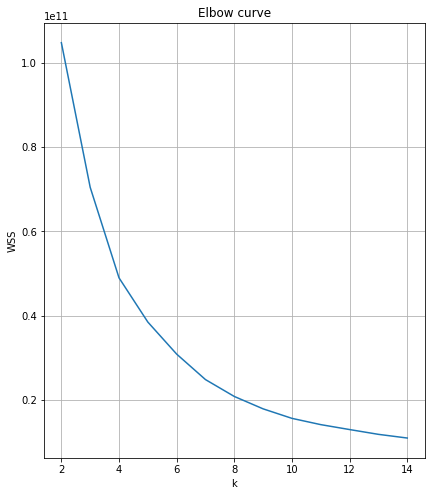

In [9]:
X = sector_split_tot
distorsions = []

# Calculate SSE for different K
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state = 301)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

# Plot values of SSE
plt.figure(figsize=(15,8))
plt.subplot(121, title='Elbow curve')
plt.xlabel('k')
plt.ylabel('WSS')
plt.plot(range(2, 15), distorsions)
plt.grid(True)

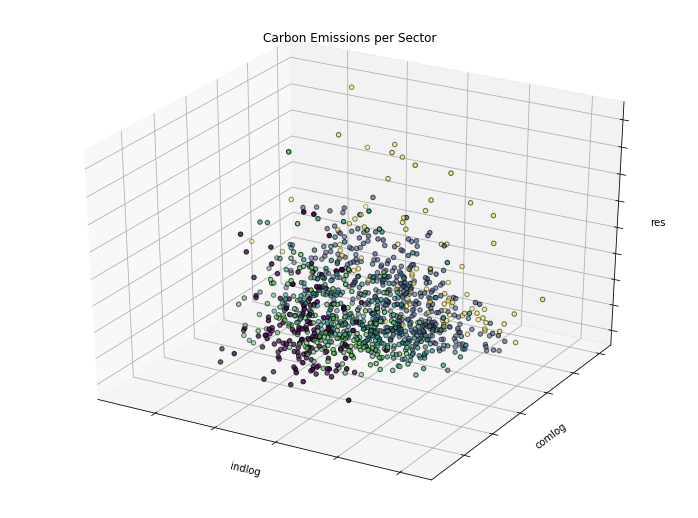

In [10]:
est =KMeans(n_clusters=5)
X=sector_split_tot[['indlog','comlog','res']]
x='indlog'
y='comlog'
z='res'
fig = plt.figure(1, figsize=(10, 7))
ax = Axes3D(fig, rect=[0, 0, .95, 1])
est.fit(X,sample_weight=towns['income']*10)
labels = est.labels_

ax.scatter(X[x], X[z], towns['income'],
            c=labels.astype(np.float), edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
ax.set_title('Carbon Emissions per Sector')
ax.dist = 10

In [7]:
fig = plt.figure(figsize=(10, 7))
labels = est.labels_
plt.scatter(sector_split_tot['indlog'],sector_split_tot['comlog'],c=labels.astype(np.float), edgecolor='k')
plt.legend(labels.astype(np.float))
plt.show()


NameError: name 'est' is not defined

<Figure size 720x504 with 0 Axes>

In [233]:
labels.astype(np.float)

array([1., 0., 0., ..., 2., 3., 0.])

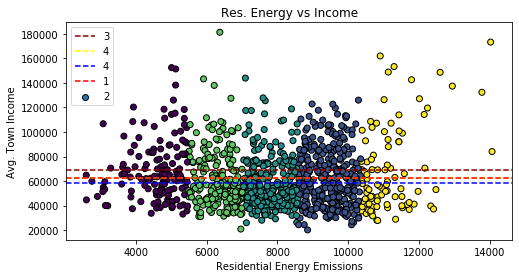

In [13]:
fig = plt.figure(figsize=(8, 4))
labels = est.labels_
mean0=towns.loc[check_predict['guess']==0]['income']
mean1=towns.loc[check_predict['guess']==1]['income']
mean2=towns.loc[check_predict['guess']==2]['income']
mean3=towns.loc[check_predict['guess']==3]['income']
plt.scatter(sector_split_tot['res'],towns['income'],c=labels.astype(np.float), edgecolor='k')
plt.axhline(y=np.mean(mean0), color='darkred', linestyle="--")
plt.axhline(y=np.mean(mean1), color='yellow', linestyle="--")
plt.axhline(y=np.mean(mean2), color="blue", linestyle="--")
plt.axhline(y=np.mean(mean3), color="red", linestyle="--")
plt.legend(labels)
plt.xlabel('Residential Energy Emissions')
plt.ylabel('Avg. Town Income')
plt.title('Res. Energy vs Income')
plt.show()


In [12]:
check_predict=sector_split_tot.copy()
check_predict['guess']=est.labels_

In [14]:
check_predict.groupby('guess').mean()

,com,ind,res,comlog,indlog
guess,,,,,
0,"4,511.06","2,823.28","4,599.86",8.34,7.49
1,"7,475.43","9,368.15","9,440.03",8.81,8.23
2,"6,947.79","6,873.97","7,751.91",8.72,7.92
3,"5,946.24","4,497.35","6,345.47",8.57,7.71
4,"9,420.40","13,560.41","11,171.56",8.96,8.18


In [234]:
check_predict['guess'].value_counts()

9    179
0    175
5    157
4    135
2    133
1     85
6     82
3     73
7     33
8     13
Name: guess, dtype: int64

In [38]:
check_predict.loc[check_predict['guess']==1].describe()

,com,ind,res,comlog,indlog,guess
count,348.00,348.00,348.00,348.00,348.00,348.00
mean,"7,530.82","9,483.86","9,469.25",8.82,8.22,1.00
std,"3,550.00","16,692.52",501.04,0.47,1.48,0.00
min,"1,268.16",52.10,"8,609.41",7.15,3.95,1.00
25%,"5,089.45","1,495.36","9,039.33",8.53,7.31,1.00
50%,"6,809.21","4,469.44","9,493.63",8.83,8.41,1.00
75%,"9,141.26","10,002.86","9,888.93",9.12,9.21,1.00
max,"23,984.59","122,530.70","10,425.78",10.09,11.72,1.00


In [43]:
# towns.loc[check_predict.loc[check_predict['guess']==3].index][['age','edu','income','poverty','pop']].describe()
towns['guess']=check_predict['guess']



In [52]:
towns.groupby('guess')[['income','age','pop']].mean()

,income,age,pop
guess,,,
0,"62,117.88",36.94,"103,858.22"
1,"62,678.73",38.79,"47,156.64"
2,"58,602.81",38.46,"68,789.36"
3,"70,620.08",41.13,"53,858.67"
4,"69,377.77",37.58,"189,013.96"


In [142]:
towns.loc[check_predict.loc[check_predict['guess']==2].index][['age','edu','income','poverty','pop']].describe()

,age,edu,income,poverty,pop
count,8.00,8.00,8.00,8.00,8.00
mean,42.15,88.82,"51,191.75",13.01,"24,290.88"
std,5.98,4.82,"10,621.10",6.28,"17,455.16"
min,35.40,80.80,"35,581.00",6.10,"1,556.00"
25%,39.25,85.83,"43,423.50",8.07,"13,841.00"
50%,40.55,89.45,"53,289.00",12.40,"20,867.50"
75%,43.48,90.98,"55,920.75",16.05,"34,955.50"
max,52.20,96.90,"69,118.00",24.70,"52,378.00"


In [41]:
# Generate silhouette coefficient for each k
X = sector_split
silhouette_plot = []
for k in range(2, 10):
    clusters = KMeans(n_clusters=k, random_state=10)
    cluster_labels = clusters.fit_predict(X)
    silhouette_avg = metrics.silhouette_score(X, cluster_labels)
    silhouette_plot.append(silhouette_avg)

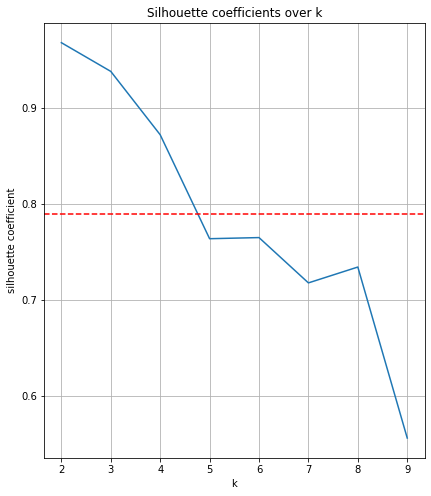

In [42]:
# Plot Silhouette coefficient
plt.figure(figsize=(15,8))
plt.subplot(121, title='Silhouette coefficients over k')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.plot(range(2, 10), silhouette_plot)
plt.axhline(y=np.mean(silhouette_plot), color="red", linestyle="--")
plt.grid(True)

In [20]:
import numpy as np
import matplotlib.pyplot as plt
# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)


X = 
y = iris.target

estimators = [('k_means_towns_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()

SyntaxError: invalid syntax (<ipython-input-20-5bba567a52e8>, line 13)

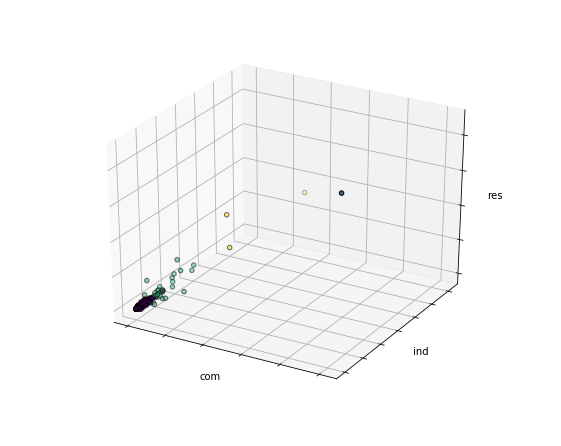